In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 


In [2]:
import pandas as pd
df = pd.read_csv("breast-cancer.csv") 
print(df.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
# Load the dataset
df = pd.read_csv("breast-cancer.csv")  # replace with your filename

# Drop the ID column
df = df.drop('id', axis=1)

# Encode the target variable ('diagnosis': M = malignant, B = benign)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M -> 1, B -> 0

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [10]:
# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)


In [21]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("🔹 Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


🔹 Linear Kernel Accuracy: 0.9766081871345029
[[106   2]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [18]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("RBF Kernel SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))


RBF Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [14]:
params = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), params, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9672784810126581


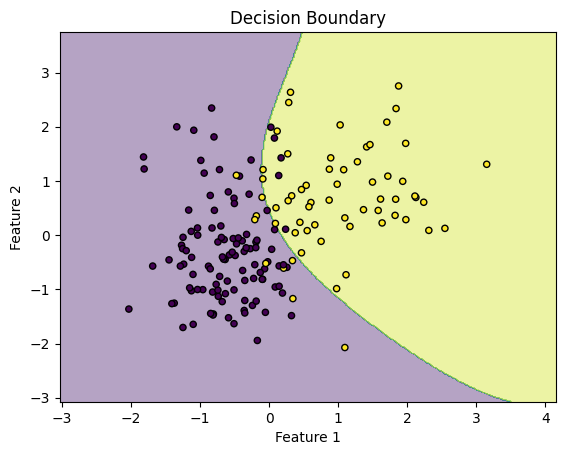

In [16]:
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Visualize using only first two features
X_small = X_scaled[:, :2]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_small, y, test_size=0.3, random_state=42)
svc_vis = SVC(kernel='rbf', C=1, gamma=0.1)
svc_vis.fit(X_train_s, y_train_s)

plot_decision_boundary(X_test_s, y_test_s, svc_vis)


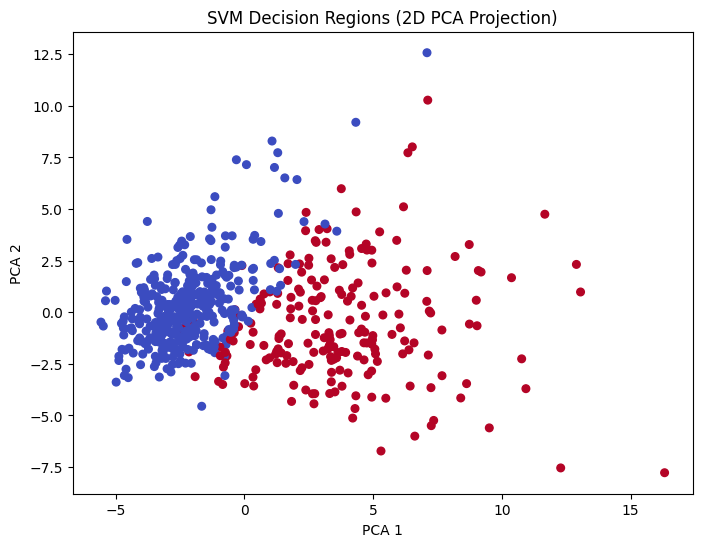

In [24]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

svm_2d = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_2d.fit(X_reduced, y)

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap='coolwarm', s=30)
plt.title("SVM Decision Regions (2D PCA Projection)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [26]:
scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Cross-validation scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Average CV Score: 0.9736376339077782
